### Algorithms Analysis - New Algorithm
- Daniel Aguirre - 201711822 
- Julián Ríos - 201517163
- Ivan Salazar - 201629873

Steps:
1. Create Graph
2. Review Hour Function to Paths Weight
3. Dijkstra

### 1. Create Graph

The following is the example graph used for the tests, each weigth represent the number of hours the path would normally take, this number can be changed depending on the current time on clock.

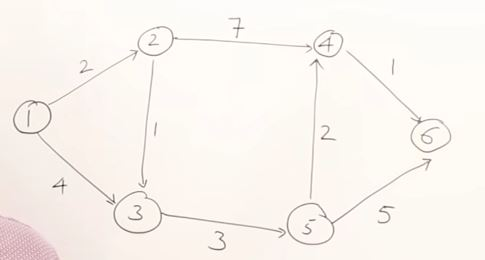

In [56]:
#Create Graph
import networkx as nx
from heapq import heapify, heappush, heappop
import sys

inf = sys.maxsize
G = nx.MultiDiGraph()
r=range(1,7)
G.add_nodes_from (r)
G.source = 0

for i in r:
  #P is the predecessor node in the path for the Dijkstra Algorithm
  #L is the current time in clock when visiting the node
  #D is the time traveled when reaching the node
  G.nodes[i]["p"] = [] 
  G.nodes[i]["l"] = inf
  G.nodes[i]["d"] = inf
keys = G.add_edges_from ([(1,2,{"c":2}), (1,3,{"c":4}), (2,3,{"c":1}), (2,4,{"c":7}), 
                          (3,5,{"c":3}), (5,4,{"c":2}), (5,6,{"c":5}), (4,6,{"c":1})]) #(v, u, dict with characteristics)
print(G.nodes(data=True))
print(G.edges(data=True))
for edge in G[1]:
  print("edge is: ",edge)
  print("cost is: ",G.edges[1,edge,0]["c"])
    
#IMPORTANT: 1 = source, edge = destiny, 0 = *is nothing, ignore (implementation of newtorkx requires it)*
#For retrive information of a edge if time is a dictionary
#print(G.edges[1,2,0]["time"][1])

#NOTES
#I can asign several variables to each edge, including a dictionary with cost by hour

[(1, {'p': [], 'l': 9223372036854775807, 'd': 9223372036854775807}), (2, {'p': [], 'l': 9223372036854775807, 'd': 9223372036854775807}), (3, {'p': [], 'l': 9223372036854775807, 'd': 9223372036854775807}), (4, {'p': [], 'l': 9223372036854775807, 'd': 9223372036854775807}), (5, {'p': [], 'l': 9223372036854775807, 'd': 9223372036854775807}), (6, {'p': [], 'l': 9223372036854775807, 'd': 9223372036854775807})]
[(1, 2, {'c': 2}), (1, 3, {'c': 4}), (2, 3, {'c': 1}), (2, 4, {'c': 7}), (3, 5, {'c': 3}), (4, 6, {'c': 1}), (5, 4, {'c': 2}), (5, 6, {'c': 5})]
edge is:  2
cost is:  2
edge is:  3
cost is:  4


### 2. Review Hour Function to Paths Weight

In [29]:
#Create list of weights for every path every hour: midnight(0-6), morning(6-12), afternoon(12-18), night(18-00).
#This is an aproximation and times can be smaller
def review_hour(t):
  if t < 6:
    return 1
  elif t < 12:
    return 2
  elif t < 18:
    return 1.5
  else:
    return 1.25   

### 3. Dijkstra

In [57]:
def dijkstra(graph, t0, s): #return dv = shortest path
  #Begin for source node
  G.source = s
  G.nodes[s]["l"] = t0
  G.nodes[s]["d"] = 0
  visited = []
  temp = s
  for i in range(len(G.nodes)-1): #loop for every node
    #print("actual node", temp)
    if temp not in visited:
      visited.append(temp)
      min_heap = []
      for neighbor in G[temp]: #loop for every neighbor
        #print("neighbor: ", neighbor)
        if neighbor not in visited:
          #print("weight factor:", review_hour(graph.nodes[temp]["l"]))
          cost = graph.nodes[temp]["d"]+graph.edges[temp,neighbor,0]["c"]*review_hour(graph.nodes[temp]["l"])
          #print("Cost is:", cost)
          if cost < graph.nodes[neighbor]["d"]:
            graph.nodes[neighbor]["d"] = cost
            #print("actual cost:", graph.nodes[neighbor]["d"])
            graph.nodes[neighbor]["l"] = (graph.nodes[temp]["l"] + graph.edges[temp,neighbor,0]["c"]*review_hour(graph.nodes[temp]["l"]))%24
            graph.nodes[neighbor]["p"] = [temp]
          heappush(min_heap,(graph.nodes[neighbor]["d"],neighbor))
      heapify(min_heap)
      #print("min heap:" ,min_heap)
      temp = min_heap[0][1]

    
#Note that with this example, the mynimal cost and path differs since time 
dijkstra(G,3,1)
print(G.nodes(data=True))

[(1, {'p': [], 'l': 3, 'd': 0}), (2, {'p': [1], 'l': 5, 'd': 2}), (3, {'p': [2], 'l': 6, 'd': 3}), (4, {'p': [2], 'l': 12, 'd': 9}), (5, {'p': [3], 'l': 12, 'd': 9}), (6, {'p': [4], 'l': 13.5, 'd': 10.5})]


In [62]:
#dijkstra should be previously run on the graph
def get_route(graph, destiny):
    rt = [destiny]
    while destiny != G.source:
        destiny = graph.nodes[destiny]["p"][0]
        rt.append(destiny)
    return rt[::-1]

get_route(G,6)

[1, 2, 4, 6]